<a href="https://colab.research.google.com/github/MuhammadDanyialKhan/Google-Colaboratory-Notebooks/blob/master/DiamondPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow-gpu==1.14.0 keras

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [9]:
import tensorflow as tf
import pandas as pd

import numpy as np
tf.__version__

'2.2.0-rc1'

In [0]:
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Setup Training Data

In [11]:
df = pd.read_csv('/content/diamonds.csv', index_col=None)
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [0]:
from sklearn.model_selection import train_test_split
X = df[['carat', 'cut_ord', 'clarity_ord']]
y = df.price.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(35000, 3)

## Create a model using tf.keras

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[3]),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])
 
optimizer = tf.keras.optimizers.Adam(0.001)

In [0]:
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [16]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1094/1094 [==============================] - 3s 2ms/step - loss: 18442104.0000 - mean_absolute_error: 3084.8164 - mean_squared_error: 18444556.0000
Epoch 2/100
1094/1094 [==============================] - 3s 2ms/step - loss: 6581461.5000 - mean_absolute_error: 1865.1619 - mean_squared_error: 6582299.0000
Epoch 3/100
1094/1094 [==============================] - 3s 2ms/step - loss: 2718345.7500 - mean_absolute_error: 1049.2041 - mean_squared_error: 2718673.5000
Epoch 4/100
1094/1094 [==============================] - 2s 2ms/step - loss: 2116592.0000 - mean_absolute_error: 870.1208 - mean_squared_error: 2116965.2500
Epoch 5/100
1094/1094 [==============================] - 3s 2ms/step - loss: 1789742.7500 - mean_absolute_error: 781.4174 - mean_squared_error: 1789767.2500
Epoch 6/100
1094/1094 [==============================] - 3s 2ms/step - loss: 1622911.2500 - mean_absolute_error: 742.1398 - mean_squared_error: 1623035.2500
Epoch 7/100
1094/1094 [==============================

## Prediction

In [0]:
test_df = pd.read_csv('/content/new-diamonds.csv')
test_df = test_df.drop(columns='price', axis=1)
new_df = test_df[['carat', 'cut_ord', 'clarity_ord']]

In [47]:
new_df[:1]

,carat,cut_ord,clarity_ord
0,1.22,4,3


In [0]:
preds = model.predict(X_test)

In [48]:
diamond = {
    'carat': [1.5],
    'cut_ord': [3],
    'clarity_ord': [5]
}
d = pd.DataFrame(diamond)
d

,carat,cut_ord,clarity_ord
0,1.5,3,5


In [0]:
# predicting price using model
m_price = model.predict(d)

In [0]:
# predicting price using equation
def diamond_price_equation(carat, cut, clarity):
  return (-5269 + (8413 * carat) + (158.1 * cut) + (454 * clarity))

In [0]:
price = diamond_price_equation(1.5, 3, 5)

In [60]:
print('Price predicted by model: %.2f'%m_price)
print('Price predicted by model equation: %.2f'%price)
print('Difference between prices: %.2f'%(m_price-price))

Price predicted by model: 11335.80
Price predicted by model equation: 10094.80
Difference between prices: 1241.00


In [20]:
actual_price_df = pd.DataFrame(y_test, columns=['Actual Price'])
predicted_price_df = pd.DataFrame(preds, columns=['Predicted Price'])
test_data_set = pd.concat([X_test, actual_price_df, predicted_price_df], axis=1)
test_data_set.head()

,carat,cut_ord,clarity_ord,Actual Price,Predicted Price
0,0.51,4.0,4.0,6884.0,5555.071777
1,2.25,1.0,1.0,3212.0,2939.545166
2,NaN,NaN,NaN,1424.0,1455.466431
3,NaN,NaN,NaN,2138.0,2238.833740
4,0.30,5.0,7.0,11294.0,10653.628906


In [21]:
test_data_set.shape

(25453, 5)

In [0]:
new_preds = model.predict(new_df)

In [0]:
def recommend_price(prices, percentage):
  return np.sum(prices) * percentage

def total_price_sum(prices):
  return np.sum(prices)

In [68]:
print('I reccomend %.2f price to the jewelry company to bid.'%recommend_price(new_preds, 0.7))
print('Total price: %.2f'%total_price_sum(new_preds))

I reccomend 8235782.80 price to the jewelry company to bid.
Total price: 11765404.00


In [0]:
new_pred_df = pd.DataFrame(new_preds, columns=['price'])

In [36]:
test_df = pd.concat([test_df, new_pred_df], axis=1)
test_df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,1.22,Premium,4,G,SI1,3,6347.700195
1,2,1.01,Good,2,G,VS2,5,5888.489746
2,3,0.71,Very Good,3,I,VS2,5,2681.838623
3,4,1.01,Ideal,5,D,SI2,2,4329.229004
4,5,0.27,Ideal,5,H,VVS2,6,684.740356


In [0]:
test_df.to_csv('new_diamond_prices.csv')

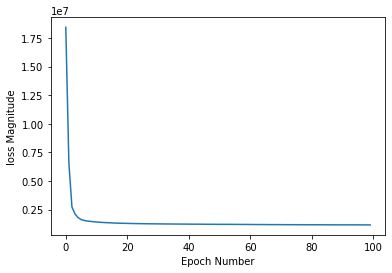

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("loss Magnitude")
plt.plot(history.history['loss'])

# Scattter plot



In [27]:
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind')
#sns.set(style='whitegrid', palette=sns.color_palette("GnBu_d"))
#sns.set(style='darkgrid', palette=sns.color_palette("BuGn_r"))

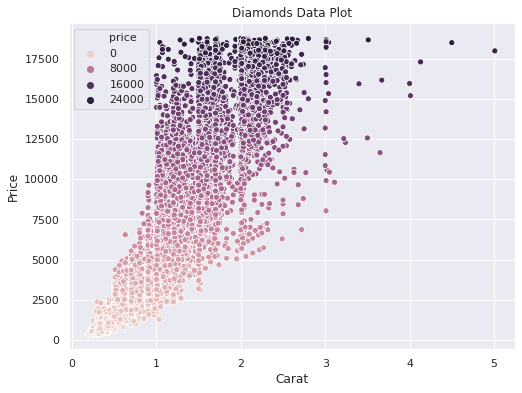

In [29]:
# plot
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(data=df, x="carat", y="price", hue='price')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_title('Diamonds Data Plot')
plt.show()

## Tranning and testing data set plot

In [0]:
# value = value=(X_train['carat']>1.5) & (y_train>1000) 
# X_train['color'] = np.where( value==True , "#9b59b6", "#3498db")

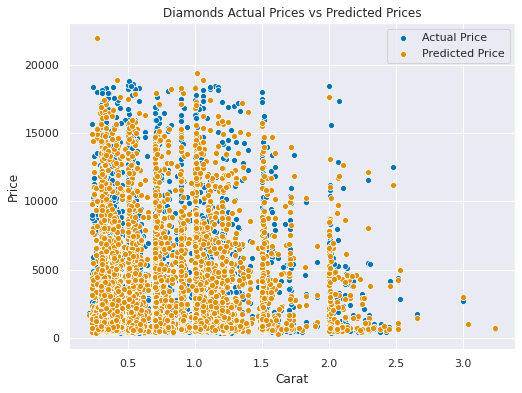

In [33]:
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(data=test_data_set, x='carat', y='Actual Price')
ax = sns.scatterplot(data=test_data_set, x='carat', y='Predicted Price')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_title('Diamonds Actual Prices vs Predicted Prices')
ax.legend(labels=['Actual Price', 'Predicted Price'])
plt.show()

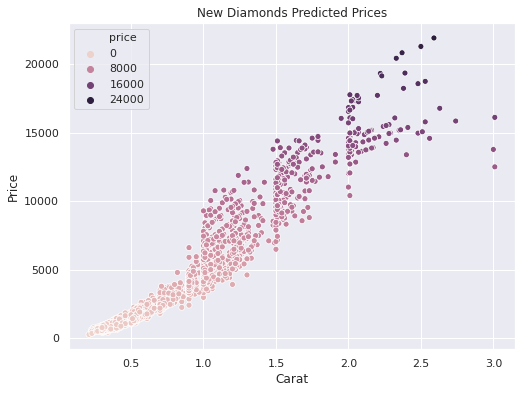

In [37]:
#plot
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(data=test_df, x="carat", y="price", hue='price')
ax.set_title('New Diamonds Predicted Prices')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
plt.show()

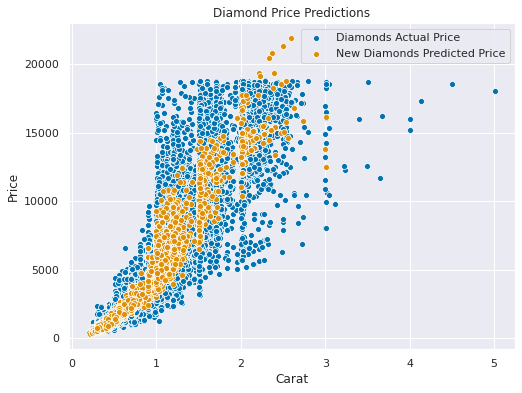

In [39]:
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(data=df, x='carat', y='price', palette=['green'])
ax = sns.scatterplot(data=test_df, x='carat', y='price')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_title('Diamond Price Predictions')
ax.legend(labels=['Diamonds Actual Price', 'New Diamonds Predicted Price'])
plt.show()

# Linnear Regression

In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [0]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

In [0]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Squared Error: %.4f'%lin_rmse)

In [0]:
lin_mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %.4f'%lin_mae)

## Visualize Predictions

In [0]:
y_pred_df = pd.DataFrame(y_pred, columns=['LinReg Prediced Prices'])
test_data_set = pd.concat([test_data_set, y_pred_df], axis=1)
test_data_set.head()

In [0]:
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(data=test_data_set, x='carat', y='Actual Price')
ax = sns.scatterplot(data=test_data_set, x='carat', y='LinReg Prediced Prices')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_title('Diamond Price Predictions')
ax.legend(labels=['Actual Price', 'Predicted Price'])
plt.show()

In [0]:
new_df.head()

In [0]:
new_y_pred = regressor.predict(new_df)

In [0]:
new_y_pred_df = pd.DataFrame(new_y_pred, columns=['LinReg Predicted Price'])

In [0]:
test_df = pd.concat([test_df, new_y_pred_df], axis=1)
test_df.head()

In [0]:
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(data=df, x='carat', y='price', palette=['green'])
ax = sns.scatterplot(data=test_df, x='carat', y='LinReg Predicted Price')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_title('Diamond Price Predictions using Linnear Regression')
ax.legend(labels=['Diamonds DataSet', 'New Diamonds Predicted Price'])
plt.show()

## Gradient Boosting Regressor


In [0]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

In [0]:
print('Gradient Boosting R Squared: %.40f'%model.score(X_test, y_test))

In [0]:
y_pred = model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print('Gradient Boosting RMSE: %.40f'%lin_rmse)

Worst presormance

# Conclusion
Tensorflow model performed out class. Linnear Regression and Gradient Boosting have worst performance.
Predictions of tensorflow model are quite accurate and I feel confident that tensorflow model can predict Diamond Prices accurately